#Dataset Description

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [169]:
import pandas as pd

df = pd.read_csv('/content/Task (1) Dataset.csv')

In [170]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [171]:
df['Casualty_severity'].value_counts()

Casualty_severity
3     7076
na    4443
2      771
1       26
Name: count, dtype: int64

### Handle Missing Values

In [172]:
df.isna().sum()



Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [173]:
# handel large missing value

df = df.drop(['Service_year_of_vehicle'], axis=1)
df = df.drop(['Defect_of_vehicle'], axis=1)
df = df.drop(['Fitness_of_casuality'], axis=1)

df['Work_of_casuality'] = df['Work_of_casuality'].fillna('Unknown')



In [174]:
# handel small missing value

df['Educational_level']       = df['Educational_level'].ffill()
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].ffill()
df['Driving_experience']      = df['Driving_experience'].ffill()
df['Type_of_vehicle']         = df['Type_of_vehicle'].bfill()
df['Owner_of_vehicle']        = df['Owner_of_vehicle'].bfill()
df['Area_accident_occured']   = df['Area_accident_occured'].bfill()
df['Lanes_or_Medians']        = df['Lanes_or_Medians'].bfill()
df['Road_allignment']         = df['Road_allignment'].ffill()
df['Types_of_Junction']       = df['Types_of_Junction'].ffill()
df['Road_surface_type']       = df['Road_surface_type'].ffill()
df['Type_of_collision']       = df['Type_of_collision'].ffill()
df['Vehicle_movement']        = df['Vehicle_movement'].ffill()

### Correct any inconsistent data entries.

In [175]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
11052,22:30:00,Sunday,Over 51,Male,Junior high school,Employee,Below 1yr,Lorry (41?100Q),Owner,Rural village areasOffice areas,...,1,Going straight,na,na,na,na,Unknown,Not a Pedestrian,Changing lane to the right,Serious Injury
2401,16:20:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Organization,Other,...,1,Other,Driver or rider,Male,Under 18,3,Self-employed,Not a Pedestrian,Driving carelessly,Slight Injury
3607,20:18:00,Thursday,31-50,Male,Junior high school,Employee,Below 1yr,Public (> 45 seats),Owner,Church areas,...,1,Going straight,na,na,na,na,Self-employed,Not a Pedestrian,No priority to vehicle,Slight Injury
5398,15:25:00,Tuesday,31-50,Male,Junior high school,Employee,2-5yr,Public (13?45 seats),Owner,Office areas,...,1,Going straight,na,na,na,na,Driver,Not a Pedestrian,No priority to pedestrian,Slight Injury
5064,16:58:00,Thursday,Unknown,Male,Above high school,Employee,2-5yr,Lorry (41?100Q),Owner,Office areas,...,1,Going straight,na,na,na,na,Driver,Not a Pedestrian,No priority to pedestrian,Slight Injury
10518,8:50:00,Friday,Under 18,Male,Elementary school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,1,Going straight,Driver or rider,Male,18-30,3,Driver,Not a Pedestrian,Changing lane to the left,Slight Injury
9857,19:32:00,Friday,31-50,Male,Elementary school,Owner,5-10yr,Automobile,Owner,Other,...,2,Going straight,na,na,na,na,Self-employed,Not a Pedestrian,Changing lane to the left,Slight Injury
12073,17:50:00,Saturday,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Other,...,2,Moving Backward,Driver or rider,Male,18-30,3,Self-employed,Not a Pedestrian,Changing lane to the right,Serious Injury
9863,18:40:00,Tuesday,18-30,Male,Elementary school,Employee,2-5yr,Public (13?45 seats),Owner,Residential areas,...,1,Going straight,Pedestrian,Male,31-50,3,Driver,Crossing from driver's nearside,Moving Backward,Slight Injury
4472,12:35:00,Saturday,Unknown,Female,Junior high school,Employee,Above 10yr,Automobile,Owner,Other,...,1,Going straight,Pedestrian,Male,Under 18,3,Other,"In carriageway, statioNot a Pedestrianry - not...",No priority to vehicle,Slight Injury


### Ensure data types are appropriate for each column.

---



In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [177]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


### Identify and analyze patterns in the data.

<function matplotlib.pyplot.show(close=None, block=None)>

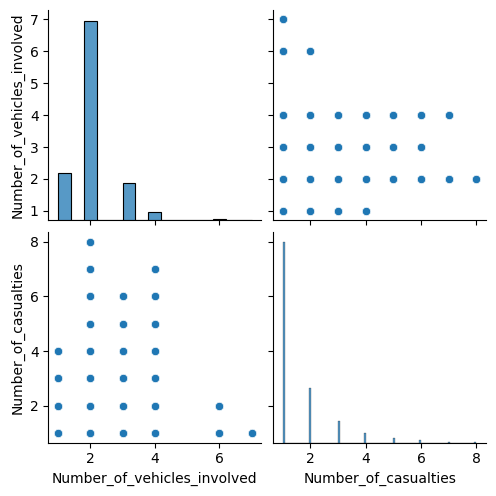

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

<Axes: xlabel='Age_band_of_driver'>

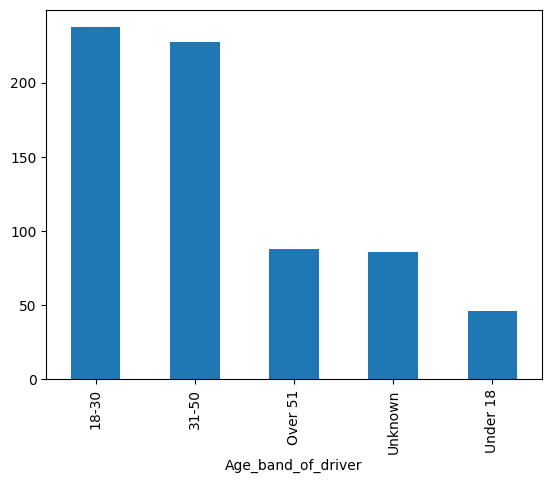

In [179]:
(df['Age_band_of_driver'].value_counts().head(10) / len('Age_band_of_driver')).plot.bar()

<Axes: xlabel='Type_of_vehicle'>

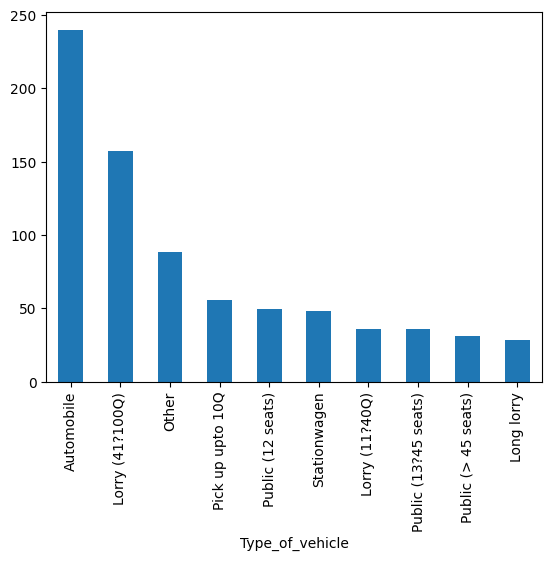

In [180]:
(df['Type_of_vehicle'].value_counts().head(10) / len('Type_of_vehicle')).plot.bar()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


<Axes: xlabel='Types_of_Junction', ylabel='Number_of_vehicles_involved'>

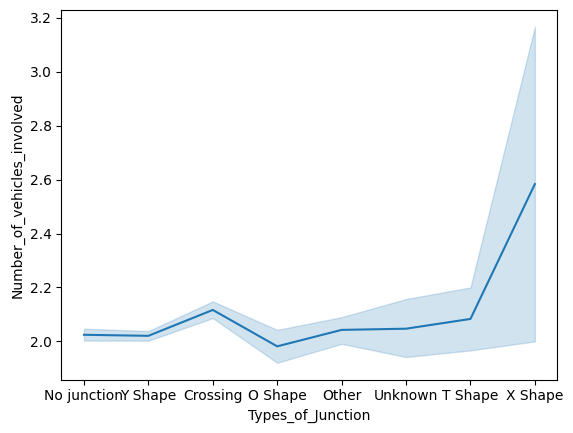

In [181]:
sns.lineplot(data= df ,x='Types_of_Junction' , y='Number_of_vehicles_involved')

<Axes: xlabel='Type_of_vehicle', ylabel='Number_of_casualties'>

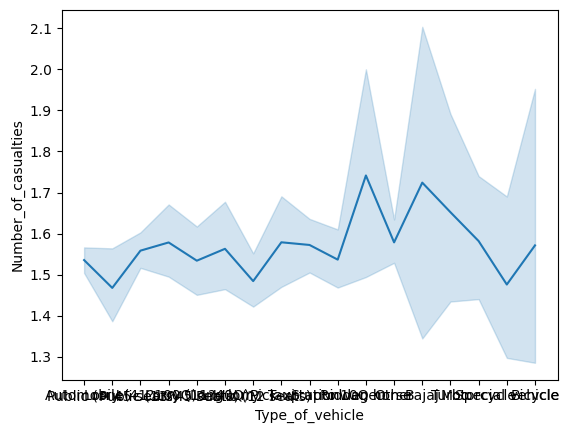

In [182]:
sns.lineplot(data=df , x='Type_of_vehicle' , y='Number_of_casualties')

<Axes: xlabel='Road_surface_conditions', ylabel='Number_of_casualties'>

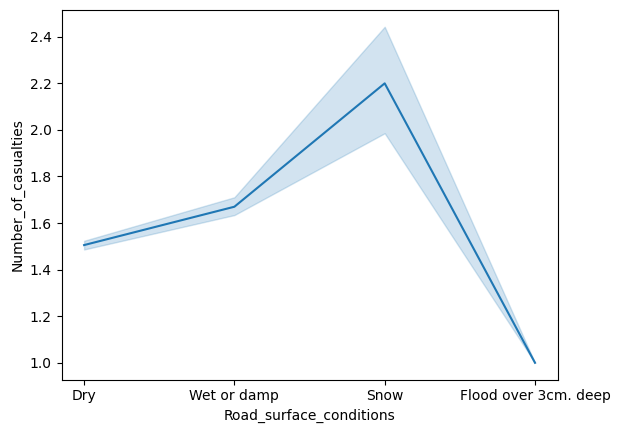

In [183]:
sns.lineplot(data=df , x='Road_surface_conditions' , y='Number_of_casualties')

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


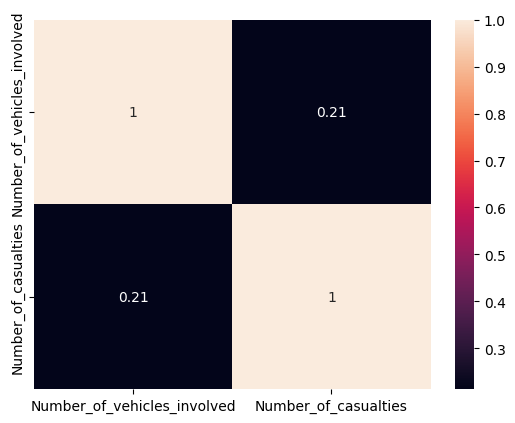

In [184]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

<Axes: xlabel='Weather_conditions', ylabel='Number_of_casualties'>

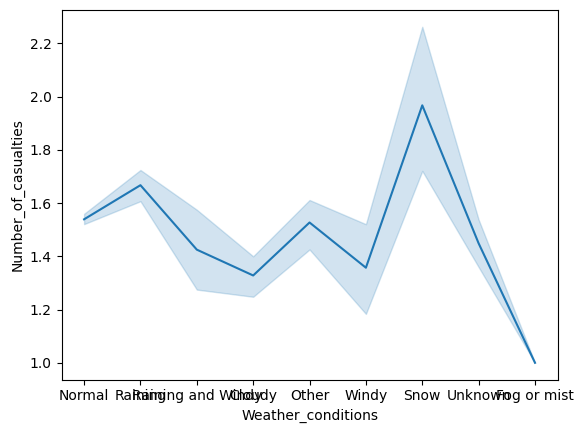

In [185]:
sns.lineplot(data=df , x='Weather_conditions' , y='Number_of_casualties')

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

<Axes: ylabel='Frequency'>

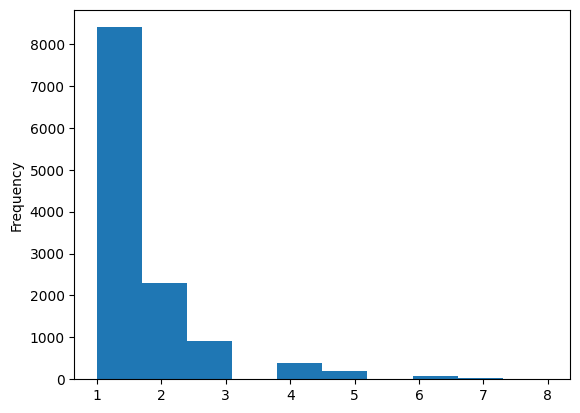

In [186]:
df['Number_of_casualties'].plot.hist()

<Axes: ylabel='count'>

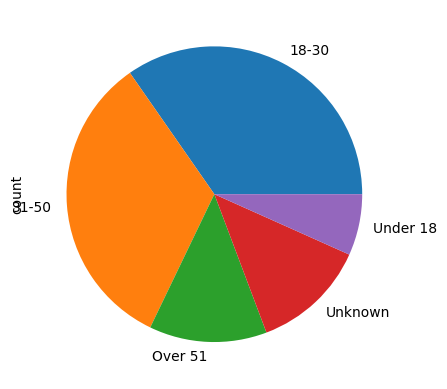

In [167]:
(df['Age_band_of_driver'].value_counts().head(10) / len('Age_band_of_driver')).plot.pie()

<Axes: ylabel='Frequency'>

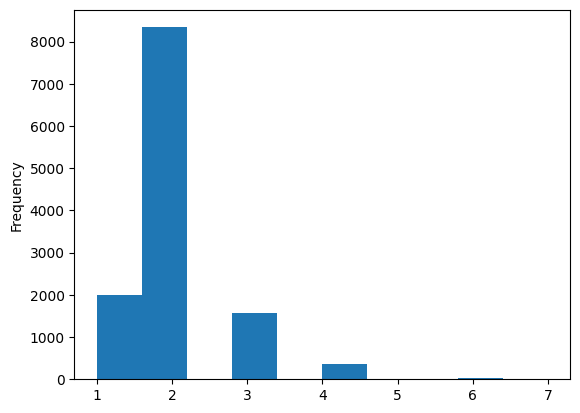

In [187]:
df['Number_of_vehicles_involved'].plot.hist()

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

we can see the average accudint the age between 18 to 30
and average accident in snow was very high
and the number of car involvd in x shape was high
and the automobile was the high between diffrent type **bold text**
